# Programming Exercise: k-Means Clustering
In this exercise you will have to implement the k-means clustering algorithm. 

A basic datastructure is already defined as well as a function for plotting the result

In [85]:
# Please enter your names for identification
name = "Fabian Langer, Yannik Bretschneider"


In [86]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Tell matplotlib to plot inside the Notebook
%matplotlib inline

class Point:
    x = 0
    y = 0
    cluster = -1
    def __init__(self, x = 0, y = 0, c = -1):
        self.x = x
        self.y = y
        self.cluster = c

    def distanceTo(self, point):
        # Compute Euclidean distance
        distance = np.sqrt((self.x - point.x)**2 + (self.y - point.y)**2)
        return distance
    
    def __eq__(self, value):
        # Check if two points are equal
        assert isinstance(value, Point), "Unsupported operand type(s) for ==: 'Point' and '{}'".format(type(value).__name__)
        return self.x == value.x and self.y == value.y
    
    def __mul__(self, other):
        # Scale vector by a given facter
        assert isinstance(other, (float)), "Unsupported operand type(s) for *: 'float' and '{}'".format(type(other).__name__)
        return Point(self.x * other, self.y * other)

    def __add__(self, other):
        # Add two points
        assert isinstance(other, Point), "Unsupported operand type(s) for +: 'Point' and '{}'".format(type(other).__name__)
        return Point(self.x + other.x, self.y + other.y)
    
    def __repr__(self):
        return f"Point({self.x}, {self.y} <c={self.cluster}>)"

class Cluster:
    centroid = Point()
    points = []
    cid = -1
    def __init__(self, points = [], centroid: Point = Point(), cid = -1):
        self.points = points
        self.cid = cid
        self.centroid = centroid

    def addPoint(self, point):
        self.points.append(point)
        point.cluster = self.cid
        self.centroid = self.getCenter()

    def replacePoints(self, points: list[Point]):
        self.points = points
        self.centroid = self.getCenter()

    def getCenter(self):
        cx = 0
        cy = 0
        for p in self.points:
            cx += p.x
            cy += p.y
        cx /= len(self.points)
        cy /= len(self.points)
        return Point(cx, cy, self.cid)


def get_random_hex_color():
  """Generates a random hex color code."""
  def r():
      return random.randint(0, 255)
  return '#%02X%02X%02X' % (r(),r(),r())

#We can reuse the plot2 function from the SinglePass exercise
def plot(points):
    x = []
    y = []
    cl = []
    for p in points:
        x.append(p.x)
        y.append(p.y)
        cl.append(p.cluster)
    
    plt.suptitle('k-Means')
    # Our colors for plotting the data points
    colormap = ['black','red','blue','green','orange','purple','yellow','pink']
    # In case 8 colors are not enough
    while len(list(set(cl))) > len(colormap)-1:
        colormap.append(get_random_hex_color())
  
    colors = []
    for pc in cl:
        colors.append(colormap[pc])
    # Plot the data
    plt.scatter(x, y, c=colors, s=40)    


def plot_clusters(clusters: list[Cluster]):
    x = []
    y = []
    cl = []
    cx = []
    cy = []

    for cluster in clusters:
        for p in cluster.points:
            x.append(p.x)
            y.append(p.y)
            cl.append(p.cluster)
        cx.append(cluster.centroid.x)
        cy.append(cluster.centroid.y)
    
    plt.suptitle('k-Means Clusters with Centroids')
    # Our colors for plotting the data points
    colormap = ['red','blue','green','orange','purple','yellow','pink']
    # In case 8 colors are not enough
    unique_clusters = list(set(cl))
    if -1 in unique_clusters: # Ensure -1 (unclustered) maps to black or a default
        unique_clusters.remove(-1)
    while len(unique_clusters) > len(colormap)-1:
        colormap.append(get_random_hex_color())
  
    colors = []
    for pc in cl:
        colors.append(colormap[pc if pc != -1 else 0]) # map -1 to colormap[0]
    # Plot the data points
    plt.scatter(x, y, c=colors, s=40, label='Data Points')
    # Plot the centroids
    # Centroid colors should match their cluster colors
    centroid_colors = [colormap[cluster.cid if cluster.cid != -1 else 0] for cluster in clusters]
    plt.scatter(cx, cy, c=centroid_colors, s=100, marker='X', edgecolor='black', label='Centroids')
    plt.legend()

Then we need of course the k-means clustering algorithm:

In [87]:
MAX_ITERATIONS = 1000

def kMeans(points: list[Point], k: int) -> tuple[list[Point], list[Cluster]]:
    # Write kMeans here
    # choose centroids randomly
    centroids = random.sample(points, k)
    previous_centroids = []
    iterations = 0

    clusters = None

    while centroids != previous_centroids and iterations < MAX_ITERATIONS:
        # print(centroids)
        clusters = [Cluster([], centroid, i) for i, centroid in enumerate(centroids)]
        for point in points:
            # assign point to the closest cluster
            distances = [point.distanceTo(cluster.centroid) for cluster in clusters]
            closest_cluster = np.argmin(distances)
            clusters[closest_cluster].addPoint(point)  # also updates point.cluster
        # update centroids
        previous_centroids = centroids
        centroids = [cluster.getCenter() for cluster in clusters]
        iterations += 1

    return points, clusters

Now we setup the parameters:

In [88]:
filepath  = "./clustering-datasets/"
filenames = ["Aggregation","Compound","D31","flame","jain","pathbased","R15","spiral"]
fileextension = ".txt"

In [89]:
k = 5

Finally, we can cluster the data using k-Means:

In [90]:
results = {}

for i in range(0,len(filenames)):
    datapoints = []
    f = filepath+filenames[i]+fileextension
    file = open(f,"r")
    line = file.readline()
    while(line != ""):
        a = line[:-1].split()
        x = float(a[0])
        y = float(a[1])
        datapoints.append(Point(x,y))
        line = file.readline()
    file.close()
    points, clusters = kMeans(datapoints,k)
    results[filenames[i]] = (points, clusters)
    print("Finished clustering dataset: " + filenames[i])

Finished clustering dataset: Aggregation
Finished clustering dataset: Compound
Finished clustering dataset: D31
Finished clustering dataset: flame
Finished clustering dataset: jain
Finished clustering dataset: pathbased
Finished clustering dataset: R15
Finished clustering dataset: spiral
Finished clustering dataset: spiral


And visualize the result: (You might want to execute the plot function a couple of times if the random colors are too similar.)

Plotting dataset: Aggregation


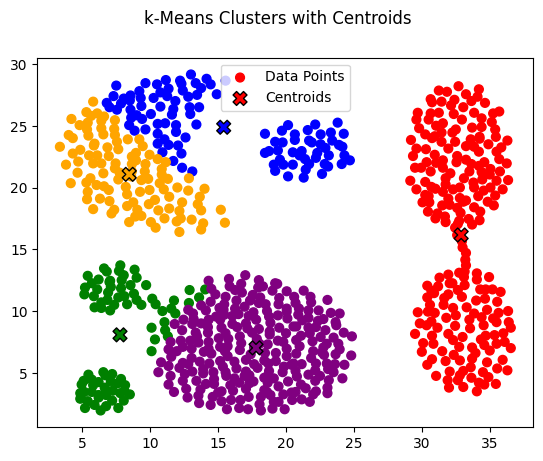

Plotting dataset: Compound


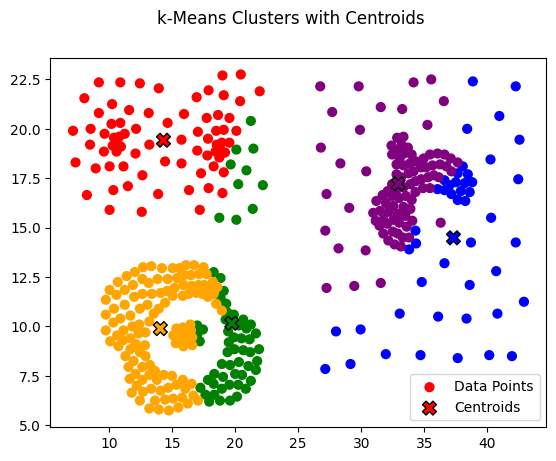

Plotting dataset: D31


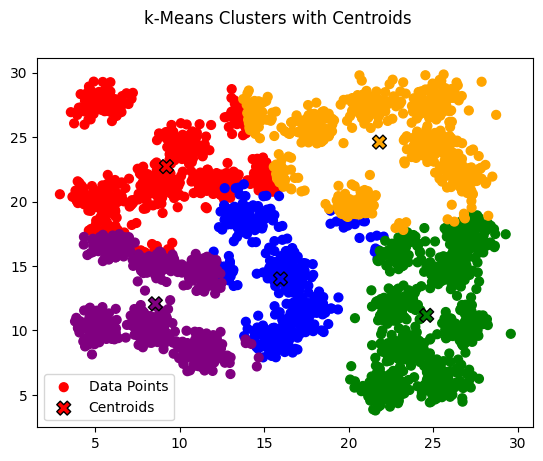

Plotting dataset: flame


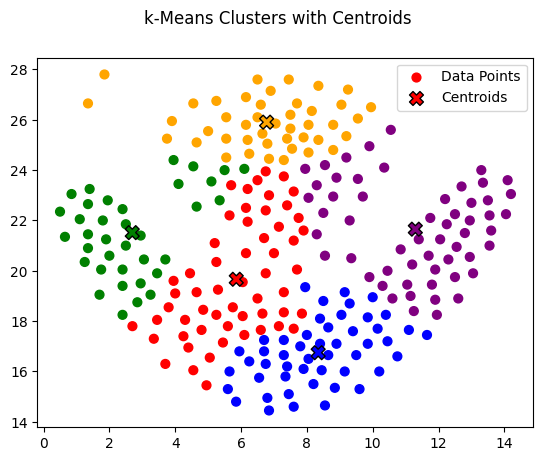

Plotting dataset: jain


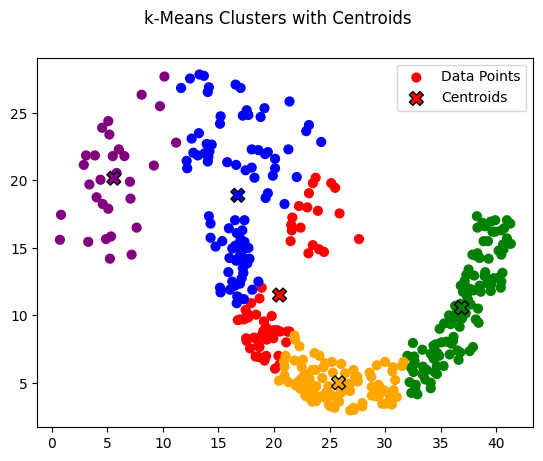

Plotting dataset: pathbased


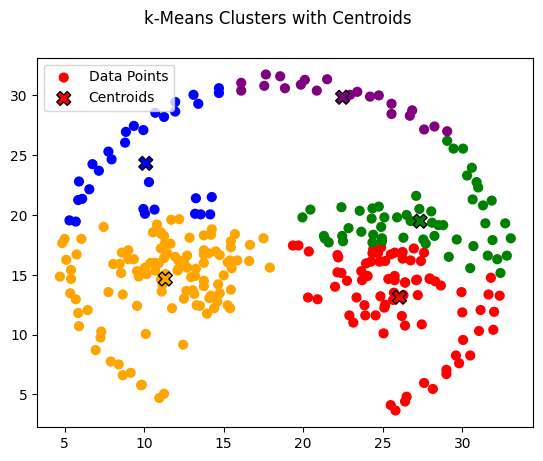

Plotting dataset: R15


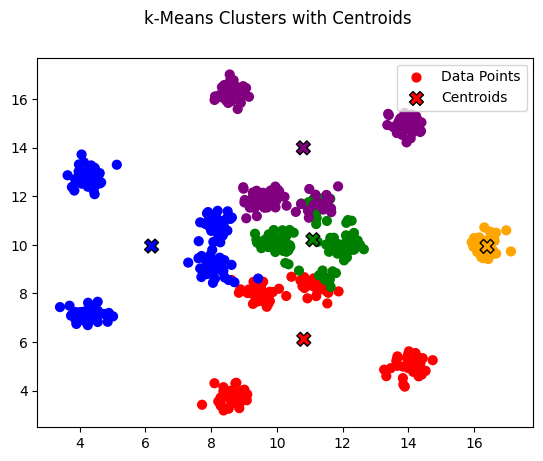

Plotting dataset: spiral


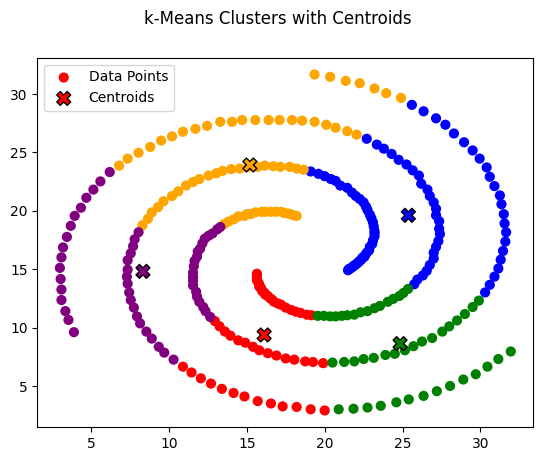

In [91]:
for result in results:
    print("Plotting dataset: " + result)
    # plot(results[result][0]) # Old plot call
    plot_clusters(results[result][1]) # New plot call with clusters
    plt.show()


# Hopkins Statistic
In this exercise, you will have to implement the Hopkins statistic.

The part for selecting the data points and random points has already been implemented.
We recommend to use NearestNeighbors from sklearn.neighbors for the implementation

In [ ]:
from sklearn.neighbors import NearestNeighbors

def hopkins_statistic(data, p, trials):
    np.random.seed(1)
    n, d = data.shape
    results = []

    for _ in range(trials):
        sample_indices = np.random.choice(n, p, replace=False)
        X_sample = data[sample_indices]

        mins = np.min(data, axis=0)
        maxs = np.max(data, axis=0)
        random_points = np.random.uniform(mins, maxs, (p, d))

        #Write hopkins_statistic here


        act_neighbours = NearestNeighbors(n_neighbors=1).fit(X_sample)
        dist, indices = act_neighbours.kneighbors(data, return_distance=True)

        # print(dist)


        rand_neighbours = NearestNeighbors(n_neighbors=1).fit(random_points)
        rand_dist, rand_indices = rand_neighbours.kneighbors(data, return_distance=True)
        # print(rand_dist)

        # print(rand_distances)
        # print(act_distances)

        # Compute the test statistic
        results.append(np.sum(dist) / (np.sum(rand_dist) + np.sum(dist)))

    return np.mean(results), np.std(results)


In [ ]:
p = 20
trials = 100

for name in filenames:
    fullpath = filepath + name + fileextension
    data = np.loadtxt(fullpath)
    mean, std = hopkins_statistic(data, p, trials)
    print(f"{name}: Average_H = {mean:.4f}, Std = {std:.4f}")

[[ 6.60549014]
 [ 6.01373428]
 [ 6.9139352 ]
 [ 7.44916103]
 [ 7.11705698]
 [ 7.67675061]
 [ 8.42763312]
 [ 6.93469538]
 [ 6.181626  ]
 [ 7.32290926]
 [ 7.94386556]
 [ 8.37749963]
 [ 8.61887464]
 [ 5.63848384]
 [ 6.41658009]
 [ 6.74481282]
 [ 7.88669766]
 [ 8.85720046]
 [ 9.43927963]
 [ 8.60232527]
 [ 9.04267659]
 [ 9.72753823]
 [10.02060377]
 [ 8.70703738]
 [ 7.91343794]
 [ 7.57792848]
 [ 7.13950278]
 [ 6.26617906]
 [ 5.25594901]
 [ 5.71773557]
 [ 6.52092785]
 [ 6.60018939]
 [ 7.51082552]
 [ 8.35703297]
 [ 8.98359616]
 [ 9.53532905]
 [10.62191132]
 [ 9.44788336]
 [ 9.10411995]
 [ 9.43663075]
 [ 9.17877988]
 [ 9.97308879]
 [ 9.77778093]
 [ 9.37616659]
 [ 8.90449325]
 [ 8.40773453]
 [ 7.80544682]
 [ 7.80928934]
 [ 7.36647813]
 [ 7.36698717]
 [ 6.77421582]
 [ 6.48845128]
 [ 5.8345951 ]
 [ 5.26307895]
 [ 5.07961613]
 [ 5.39560006]
 [ 5.99437236]
 [ 6.48151217]
 [ 7.77190453]
 [ 8.29005428]
 [ 9.02025499]
 [ 9.53428026]
 [10.4558596 ]
 [ 9.68968524]
 [10.14852206]
 [ 8.88608463]
 [ 9.48182